# Outline
1. Introduction   
2. Data Description   
3. Objective   
4. Analysis & Model development      
   4.1 Import libraries   
   4.2 Data pre-processing   
   4.3 Exploratory data analysis   
   4.4 Linear Regression Model   
   4.5 Multiple Regression Model   
   4.6 Evaluation Result   
5. Conclusion & Discussion   
6. References   

# 1. Introduction

If I want to sell a house, it would be very helpful if someone can help me predict the house prices based on the different features of the house. On the other side, if I want to buy a house, it would also be convenient if I can predict the house before negotiateing with a seller. 

In this project, I will use **Linear Regression model** & **Multiple Regression model** to predict the house prices, and evaluate wich model is more suitable for predicting house price in this case.

# 2. Data Description

I use **House Sales in King County, USA** dataset from Kaggle (source:https://www.kaggle.com/harlfoxem/housesalesprediction).   
This dataset contains 21 columns as following:    
(Notes: Although there is no description of each columns, we still can guess the meaning of each column by its name.) 

1. `id`
2. `date`
3. `price`
4. `bedrooms`
5. `bathrooms`
6. `sqft_living`
7. `sqft_lot`
8. `floors`
9. `waterfront`
10. `view`
11. `condition`
12. `grade`
13. `sqft_above` 
14. `sqft_basement`
15. `yr_built`
16. `yr_renovated`
17. `zipcode`
18. `lat`
19. `long`
20. `sqft_living15`
21. `sqft_lot15`


# 3. Objective

Using **Linear Regression model** & **Multiple Regression model** to predict the house prices, and evaluate which model is better for predicting house prices. 

# 4. Analysis & Model development

## 4.1 Import libraries

In [175]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats


## 4.2 Data pre-processing

In [176]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [177]:
# Check column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [178]:
# Check dimensionality of data
df.shape

(21613, 21)

In [179]:
# Check data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [180]:
# Check if ther is any missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no missing value in this dataset.

In [181]:
# Overview of data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 4.3 Exploratory data analysis

I would like to build regression models in this project. As a result, my first step will be overview the **Pearson correlation coefficient** to briefly know the relationship between the variables.

In our case, **price** is the target variable which we want to predict. Therefore, I would focus on the most relevant independent variables in order to build suitable regression model.

In [182]:
# Generate correlation coefficient between all the features
df_corr = df.corr()
df_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [183]:
# Generate top 10 highest correlation coefficient with "price"
price_corr_top10 = df_corr["price"].nlargest(10).index
df[price_corr_top10].corr()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat
price,1.000000,0.702035,0.667434,0.605567,0.585379,0.525138,0.397293,0.323816,0.308350,0.307003
sqft_living,0.702035,1.000000,0.762704,0.876597,0.756420,0.754665,0.284611,0.435043,0.576671,0.052529
grade,0.667434,0.762704,1.000000,0.755923,0.713202,0.664983,0.251321,0.168392,0.356967,0.114084
sqft_above,0.605567,0.876597,0.755923,1.000000,0.731870,0.685342,0.167649,-0.051943,0.477600,-0.000816
sqft_living15,0.585379,0.756420,0.713202,0.731870,1.000000,0.568634,0.280439,0.200355,0.391638,0.048858
bathrooms,0.525138,0.754665,0.664983,0.685342,0.568634,1.000000,0.187737,0.283770,0.515884,0.024573
view,0.397293,0.284611,0.251321,0.167649,0.280439,0.187737,1.000000,0.276947,0.079532,0.006157
sqft_basement,0.323816,0.435043,0.168392,-0.051943,0.200355,0.283770,0.276947,1.000000,0.303093,0.110538
bedrooms,0.308350,0.576671,0.356967,0.477600,0.391638,0.515884,0.079532,0.303093,1.000000,-0.008931
lat,0.307003,0.052529,0.114084,-0.000816,0.048858,0.024573,0.006157,0.110538,-0.008931,1.000000


Text(0.5,1,'Correlation Matrix of features')

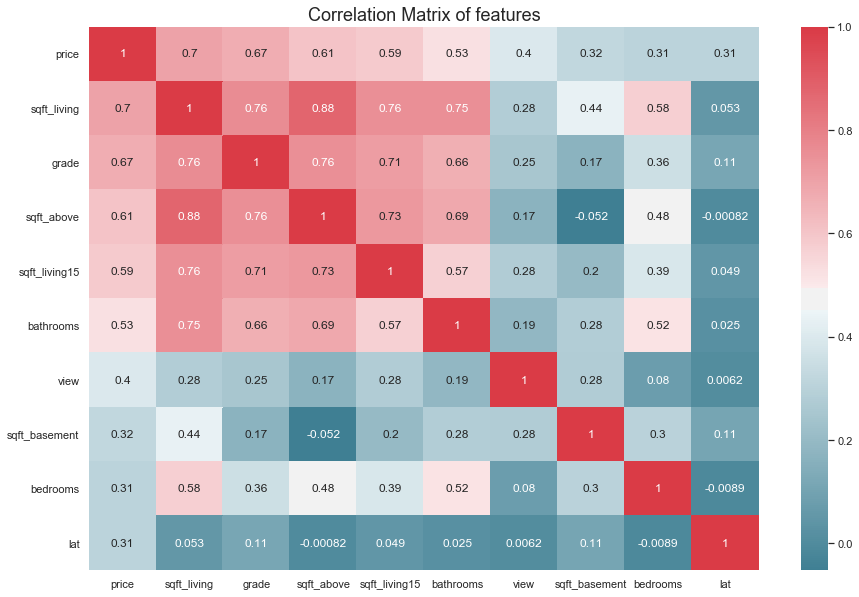

In [184]:
# Generate Correlation matrix to visualizae the correltaion coefficient of top 10 independent variables with "price"
f, ax = plt.subplots(figsize = (15,10))
sns.set(font_scale=1.0)
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[price_corr_top10].corr(), cmap = cmap, annot = True)
ax.set_title("Correlation Matrix of features",fontsize=18)

According to correlation coefficient, "sqft_living" has the highest value with "price". As a result, we choose "sqft_living" as our independent variable to build Linear Regression Model.

Then, we select 5 most relevant variables with "price" to build our Mulitiple Regression Model. These 5 independent vairables are "sqft_living", "grade", "sqft_above", "sqft_living15" and "bathrooms".

## 4.4 Linear Regression Model

Since we only consider correlation coefficient in the above analysis, it's better to double check whether p_value is small enough to indicate the strong certainty in correlation coefficient result.

In [185]:
# Double check Pearson correlation coefficient and its p_value
pearson_cof, p_value = stats.pearsonr(df["sqft_living"],df["price"])
print("The Pearson correlation coefficient is",pearson_cof, "with a P-value of P =",p_value)

The Pearson correlation coefficient is 0.7020350546118002 with a P-value of P = 0.0


In [186]:
# Check wether p_value < 0.001 (which indicate strong certainty in result.)
p_value < 0.001

True

p_value < 0.001 indicates the correlation has strong certainty.
Now, we use "sqft_living" amd "price" to build linear regression model.

In [187]:
# Set our independent variable (X) and dependent variable (y)
X = df[["sqft_living"]]
y = df[["price"]]
# Split the data into training data and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
# Build linear regression model
linear_regression_model = linear_model.LinearRegression()
# Fit data into the model
linear_regression_model.fit(X_train, y_train)
# Using the fitted model to predict target value for our test set
pred = linear_regression_model.predict(X_test)

In [188]:
# Generate the intercept and slope of our linear regression model
intercept = linear_regression_model.intercept_
slope = linear_regression_model.coef_
print("The intercept of linear regression model is",intercept)
print("The slope of linear regression model is",slope)

The intercept of linear regression model is [-47341.62743278]
The slope of linear regression model is [[282.70912351]]


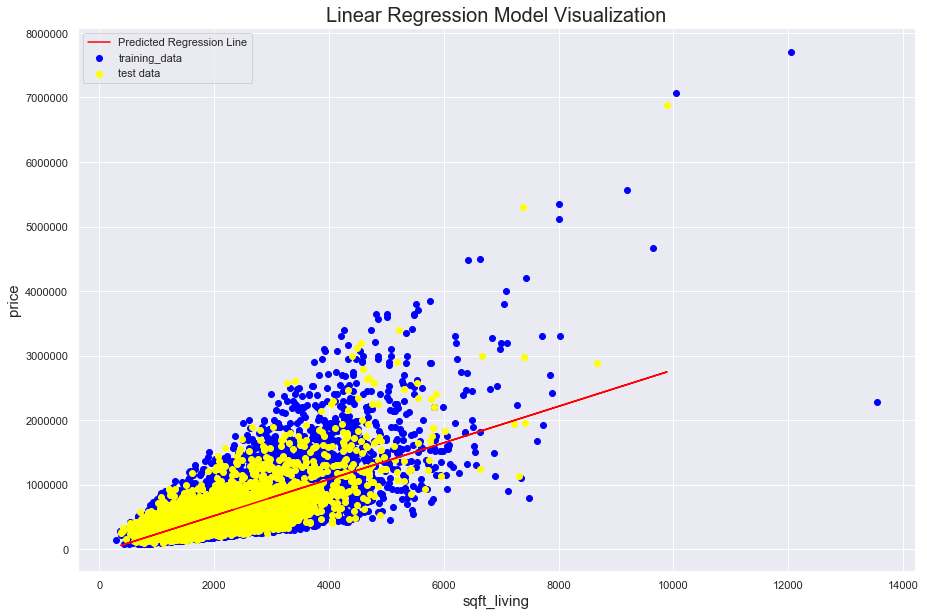

In [189]:
# Visualize training data, test data and our predicted regression line
f, ax = plt.subplots(figsize = (15,10))
plt.scatter(X_train, y_train, color = "blue", label = "training_data")
plt.scatter(X_test, y_test, color = "yellow", label = "test data")
plt.plot(X_test, pred, color = "red", label = "Predicted Regression Line")
plt.title("Linear Regression Model Visualization",fontsize =20)
plt.xlabel("sqft_living",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.legend()


We cna see the red line is our predicted regression line with intercept = -47341.6 and slope = 282.7.

In [190]:
# Generate an evaluation_table 
evaluation_table = pd.DataFrame({"Model":[],
                                "Mean Square Error (MSE)":[],
                                "R_squared(training)":[],
                                "R_squared(test)":[]
                                })

In [191]:
# Calculate mean square error
mse = mean_squared_error(y_test,pred)
mse

63850077609.09817

In [192]:
# Calculate R squared for training data
r2_training = linear_regression_model.score(X_train, y_train)
r2_training 

0.49419243211891273

In [193]:
# Calculate R squared for test data
r2_test = linear_regression_model.score(X_test, y_test)
r2_test

0.48660171685582776

In [194]:
# Insert the evaluation of linear regression model into evaluation table
evaluation_table.loc[0] = ["Linear Regression Model", mse, r2_training, r2_test]

In [195]:
evaluation_table

,Model,Mean Square Error (MSE),R_squared(training),R_squared(test)
0,Linear Regression Model,6.385008e+10,0.494192,0.486602


## 4.5 Multiple Regression Model

In [196]:
# Set our independent variable (feature including 5 variables) and dependent variable (y)
features = ["sqft_living","grade","sqft_above","sqft_living15","bathrooms"]
X = df[features]
y = df[["price"]]
# Split the data into training data and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
# Build Multiple regression model
multiple_regression_model = linear_model.LinearRegression()
# Fit data into the model
multiple_regression_model.fit(X_train, y_train)
# Using the fitted model to predict target value for our test set
pred = multiple_regression_model.predict(X_test)


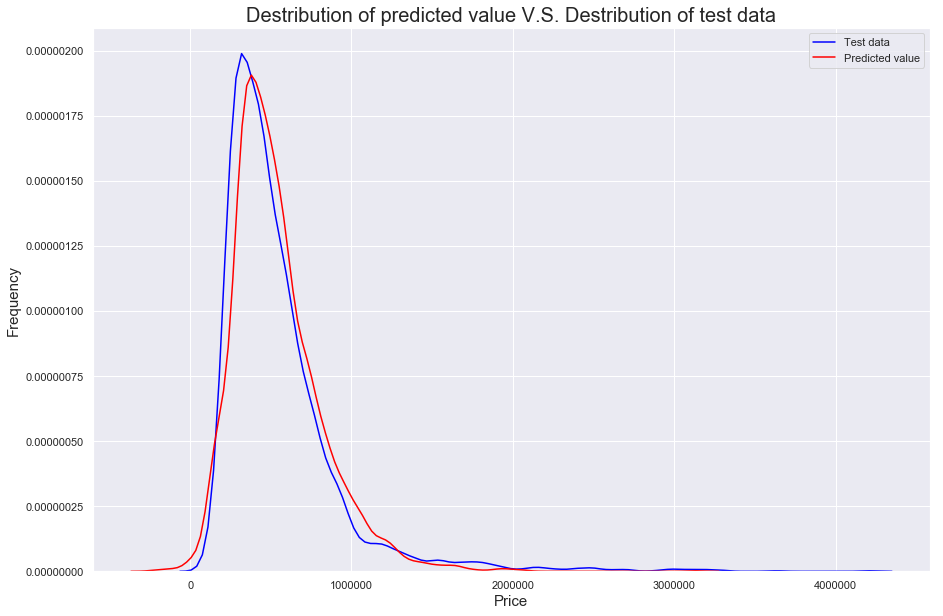

In [197]:
# Visualize the distribution of test data and predicted value
f, ax = plt.subplots(figsize = (15,10))
sns.distplot(y_test,hist=False, color = "blue", label="Test data")
sns.distplot(pred,hist=False, color="red", label = "Predicted value")
plt.title("Destribution of predicted value V.S. Destribution of test data",fontsize= 20)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.legend()

In [198]:
# Calculate mean square error
mse = mean_squared_error(y_test,pred)
mse

58732416515.09341

In [199]:
# Calculate R squared for training data
r2_training = multiple_regression_model.score(X_train, y_train)
r2_training 

0.5424495518743101

In [200]:
# Calculate R squared for test data
r2_test = multiple_regression_model.score(X_test, y_test)
r2_test

0.550711855374179

In [201]:
# Insert the evaluation of multiple regression model into evaluation table
evaluation_table.loc[1] = ["Multiple Regression Model", mse, r2_training, r2_test]

## 4.6 Evaluation Result

In [203]:
evaluation_table

,Model,Mean Square Error (MSE),R_squared(training),R_squared(test)
0,Linear Regression Model,6.385008e+10,0.494192,0.486602
1,Multiple Regression Model,5.873242e+10,0.542450,0.550712


# 5. Conclusion and Discussion

In this project, we build two regression model as below:

1. Linear Regression Model: Using **sqft_living** as independent variable to predict house price.
2. Multiple Regression Model: Using **sqft_living**, **grade**, **sqft_above**, **sqft_living15** and **bathrooms** as independent variables to predict house price.

**MSE** and **R squared** are common indicators to evaluate which model are more sutiable for our dataset. Generally, Lower MSE and higher R squared indicate better performance of the model.

According to our evaluation table, Multiple Regression Model has lower MSE than Linear Regression Model; Besides, the R squared for training data and test data of Multiple Regression Model are both higher than Linear Regression Model. We can say in this project, **multiple regression model are better than linear regression model for predicting the house price**. 

However, since we only use two kinds of regression model for predicting, there still remain lots of spaces for us to improve our model and increase our predict ability.

# 6. References
- https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices
- https://www.kaggle.com/junkal/selecting-the-best-regression-model
- https://www.kaggle.com/aniketg11/predicting-house-prices-through-regression